<a href="https://colab.research.google.com/github/smomtahe/ECG_MLClassification_WaveletsFourierFIRIIRSignalProcessing/blob/main/Fourier_Transform_and_IIR_FIR_Filter_Analysis_with_SciPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

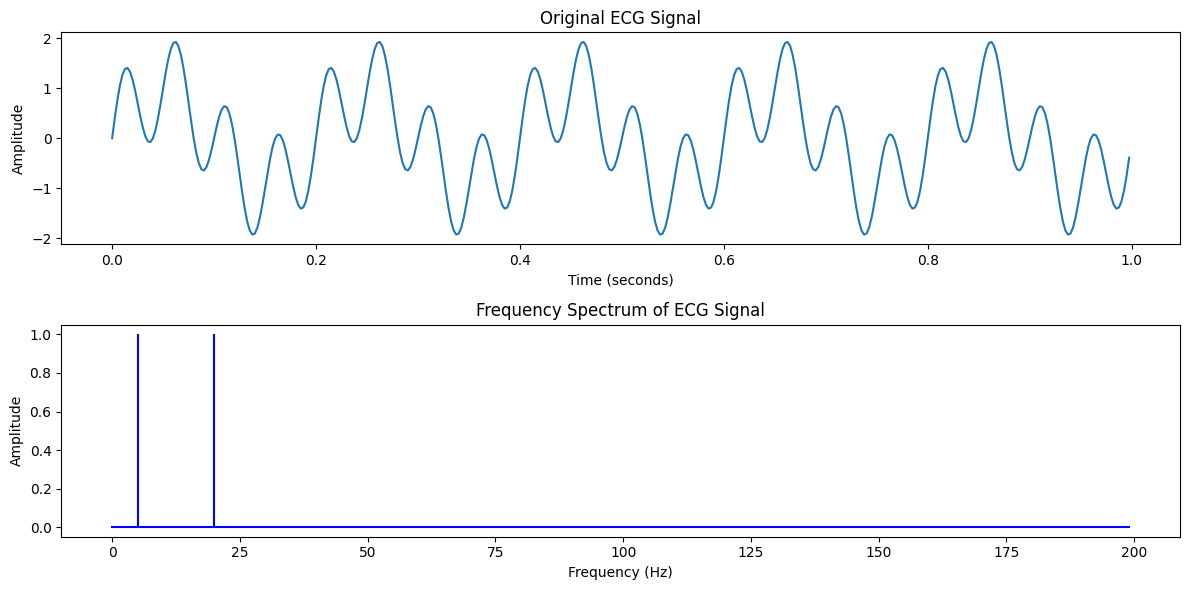

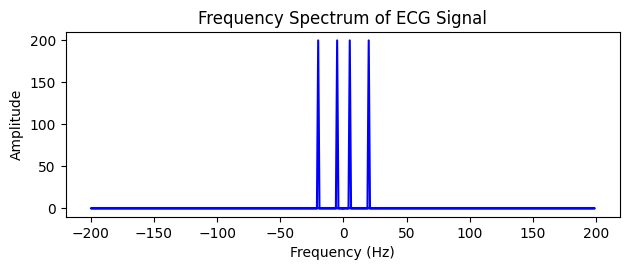

In [7]:
# This code simulates an electrocardiogram (ECG) signal and then analyzes its frequency spectrum using the Fast Fourier Transform (FFT).

import numpy as np
import matplotlib.pyplot as plt

# Simulating an ECG signal
t = np.linspace(0, 1, 400, endpoint=False)
ecg_signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 20 * t)  #  The signal consists of a mix of two sine waves with frequencies of 5 Hz and 20 Hz. The np.linspace function is used to generate a time vector t from 0 to 1 second with 400 points.

# Applying Fast Fourier Transform (FFT) to obtain its frequency spectrum ecg_fft. The np.fft.fftfreq function is used to generate the frequency axis frequency corresponding to the FFT output.
ecg_fft = np.fft.fft(ecg_signal)
frequency = np.fft.fftfreq(t.shape[-1], d=t[1] - t[0])


# Applying Discrete Fourier Transform (DFT) to obtain its frequency spectrum
ecg_dft = np.fft.fft(ecg_signal)
frequency = np.fft.fftfreq(t.shape[-1], d=t[1] - t[0])

# Plotting the positive half of the frequency spectrum and normalizing the amplitude by dividing by the number of samples n. This is done to obtain the correct amplitude values for plotting.
n = ecg_signal.size
amplitude = np.abs(ecg_fft)[:n // 2] * (2 / n)
positive_freq = frequency[:n // 2]

# Plotting the original ECG signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, ecg_signal)
plt.title('Original ECG Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# Plotting the Frequency Spectrum of the ECG signal
plt.subplot(2, 1, 2)
plt.stem(positive_freq, amplitude, 'b', markerfmt=" ", basefmt="-b")
plt.title('Frequency Spectrum of ECG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# When plotting the frequency spectrum using the Fast Fourier Transform (FFT), the amplitudes of the frequency components are typically normalized. This means that the maximum amplitude in the frequency spectrum corresponds to a value of 1.
# The positive half of the frequency spectrum is plotted, ranging from 0 to the Nyquist frequency (half of the sampling frequency). If the sampling frequency is 400 Hz, then the Nyquist frequency is 200 Hz.

# Plotting the Frequency Spectrum of the ECG signal
plt.subplot(2, 1, 2)
plt.plot(frequency, np.abs(ecg_dft), 'b')
plt.title('Frequency Spectrum of ECG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

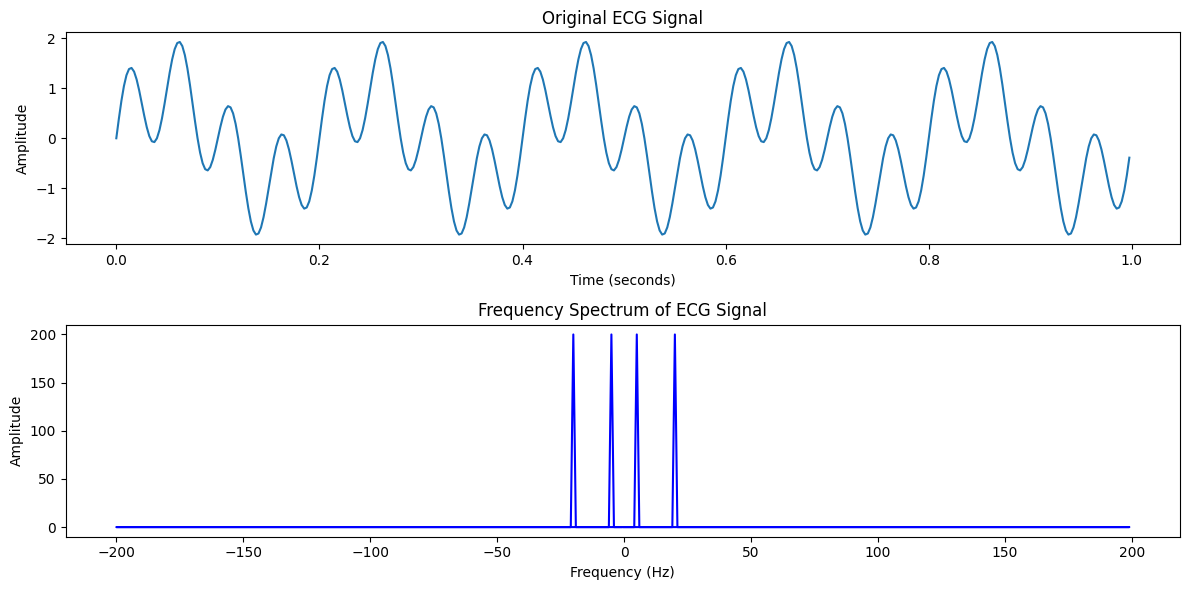

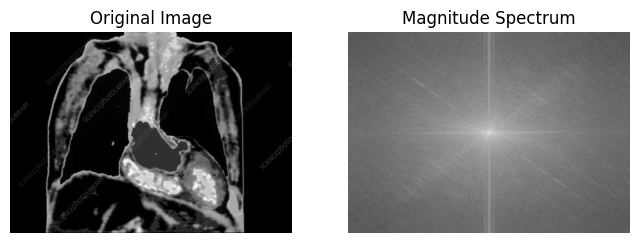

In [24]:
# Convert an image from the spatial domain to the frequency domain using the Discrete Fourier Transform (DFT),
# apply some operations in the frequency domain, and then convert it back to the original spatial domain.

import cv2
from matplotlib import pyplot as plt
import numpy as np

# Read the input image in grayscale mode
img = cv2.imread("/content/heart.jpg", 0)  # Image source: https://www.sciencephoto.com/media/304151/view/mri-scan-of-healthy-heart-and-lungs

# Compute the Discrete Fourier Transform (DFT) of the input image (converts the image from the spatial domain to the frequency domain).
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component of the Fourier transform to the center of the spectrum
dft_shift = np.fft.fftshift(dft)

# In the Fourier transform of an image, the low frequencies (which represent smooth variations in intensity, such as background or large structures)
# are typically located at the corners of the spectrum, while the high frequencies (which represent rapid changes in intensity, such as edges or fine details)
# are located at the center. By shifting the zero-frequency component to the center of the spectrum, we rearrange the frequencies so that the low frequencies are centered, making it easier to interpret the image's frequency content.

# Create a new figure for plotting
fig = plt.figure(figsize=(8, 8))

# Add a subplot to display the original image
ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')

# Add a subplot to display the magnitude spectrum of the image in the frequency domain
ax2 = fig.add_subplot(2, 2, 2)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.set_title('Magnitude Spectrum')
ax2.axis('off')

# Display the plot
plt.show()

# Magnitude spectrum refers to the representation of the frequency content of a signal in terms of the magnitudes of its frequency components.
# It is obtained by calculating the absolute values of the complex Fourier coefficients obtained from the Fourier transform of the signal.



<ipython-input-33-cac6c94d478e>:31: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


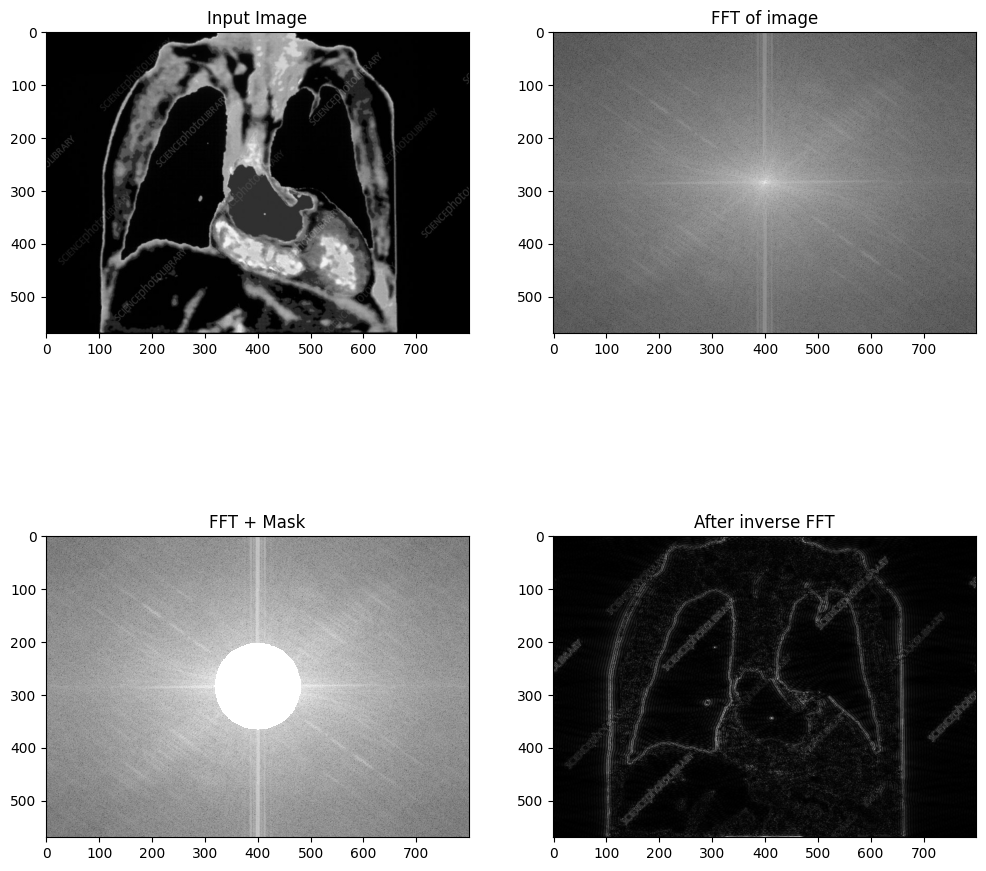

In [33]:
# Converts the input image to a 32-bit floating-point representation required for Fourier transform.
img_float32 = np.float32(img)

# Computes the Discrete Fourier Transform (DFT) of the input image.
dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)

# Rearrange the Fourier transform by shifting the zero-frequency component to the center. Otherwise, it starts at the tope left corenr of the image (array)
dft_shift = np.fft.fftshift(dft)

# Compute the magnitude spectrum of the shifted Fourier transform ## Magnitude of the function is 20.log(abs(f)); For values that are 0 we may end up with indeterminate values for log. So we can add 1 to the array to avoid seeing a warning.
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Create a circular High Pass Filter (HPF) mask to filter out low-frequency components and retain high-frequency components: center circle is 0, remaining all ones # Can be used for edge detection because low frequencies at center are blocked and only high frequencies are allowed. Edges are high frequency components.
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0

# Apply the mask to the shifted Fourier transform
fshift = dft_shift * mask

# Compute the magnitude spectrum of the masked Fourier transform
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

# Inverse Fourier transform to obtain the processed image
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

# Display the input image, FFT of the image, FFT with applied mask, and the processed image after inverse FFT
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('FFT of image')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + Mask')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT')
plt.show()


<ipython-input-36-20f36a25c426>:33: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


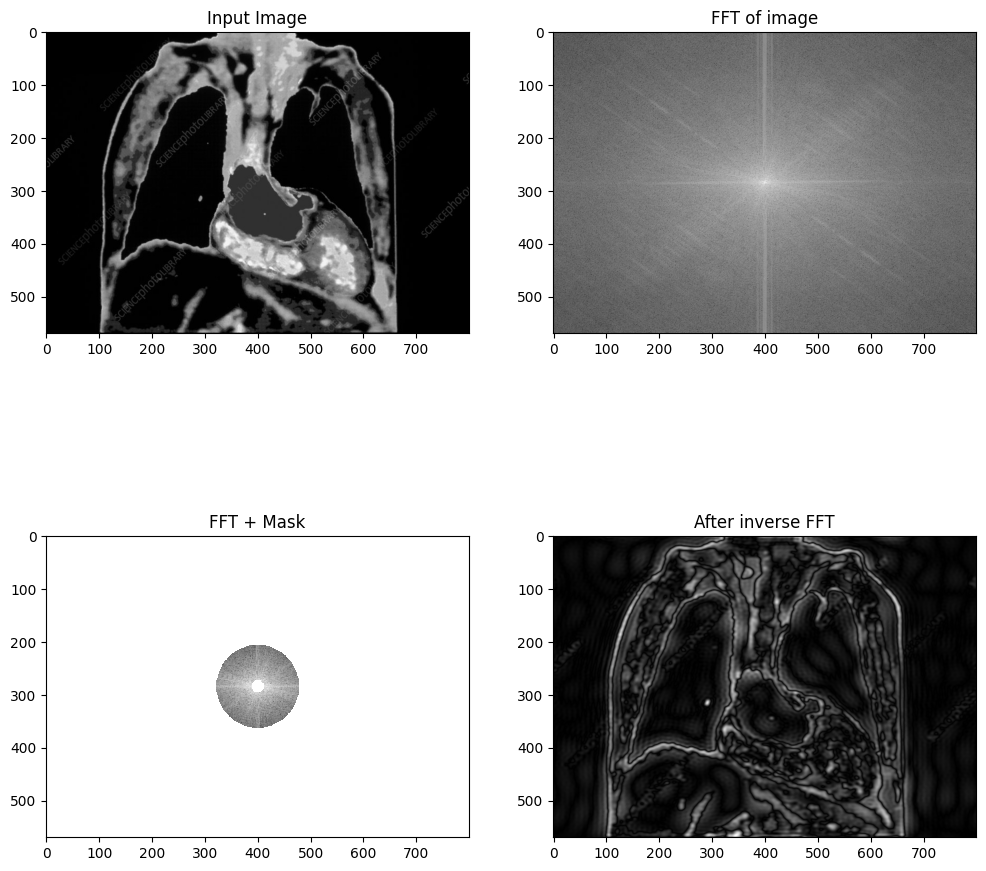

In [36]:
# Circular LPF mask, center circle is 1, remaining all zeros # Only allows low frequency components - smooth regions # Can smooth out noise but blurs edges.

rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.zeros((rows, cols, 2), np.uint8)
r = 100
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1

# Band Pass Filter - Concentric circle mask, only the points living in concentric circle are ones
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.zeros((rows, cols, 2), np.uint8)
r_out = 80
r_in = 10
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1


# Apply the mask to the shifted Fourier transform
fshift = dft_shift * mask

# Compute the magnitude spectrum of the masked Fourier transform
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

# Inverse Fourier transform to obtain the processed image
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

# Display the input image, FFT of the image, FFT with applied mask, and the processed image after inverse FFT
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('FFT of image')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + Mask')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT')
plt.show()


<ipython-input-35-6fad1c7af683>:13: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


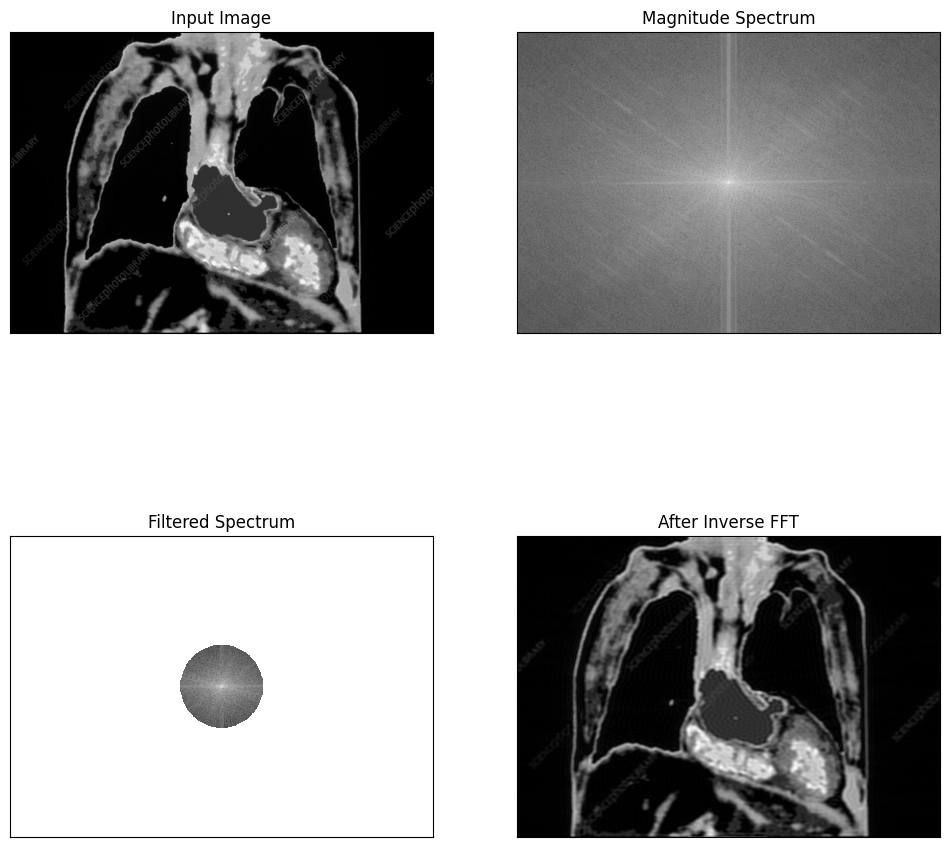

In [35]:
# Create a mask for filtering
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1

# Apply the mask to the Fourier Transform
fshift = dft_shift * mask
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

# Perform inverse Fourier Transform
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

# Plot the results
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(fshift_mask_mag, cmap='gray')
plt.title('Filtered Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(img_back, cmap='gray')
plt.title('After Inverse FFT'), plt.xticks([]), plt.yticks([])
plt.show()


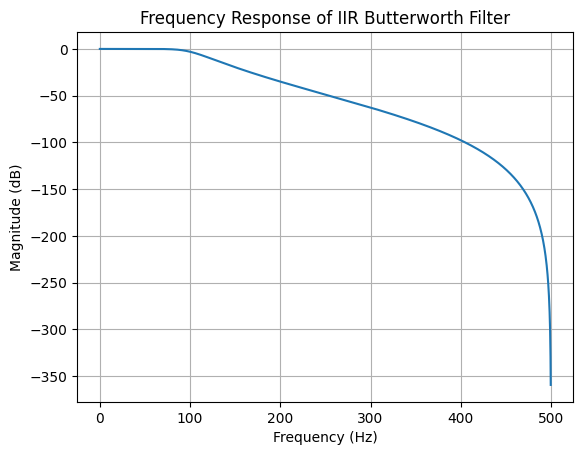

In [37]:
import matplotlib.pyplot as plt
import scipy.signal as sig
import numpy as np
from math import pi

# Close all existing plots
plt.close('all')

# Define the sampling frequency (Fs) and filter parameters
Fs = 1000  # Sampling frequency in Hz
n = 5      # Order of the filter
fc = 100   # Cutoff frequency in Hz

# Calculate the normalized cutoff frequency (angular frequency)
w_c = 2 * fc / Fs

# Design an IIR Butterworth filter using scipy.signal.butter
# This function returns the numerator (b) and denominator (a) coefficients of the filter
b, a = sig.butter(n, w_c)

# Compute the frequency response of the filter
# The function sig.freqz computes the frequency response of a digital filter
# worN is the number of points to use in the computation
[w, h] = sig.freqz(b, a, worN=2000)

# Convert the frequency axis from radians/sample to Hz
w = Fs * w / (2 * pi)

# Compute the magnitude response in decibels (dB)
h_db = 20 * np.log10(abs(h))

# Plot the magnitude response of the filter
plt.figure()
plt.plot(w, h_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)  # Enable grid on the plot
plt.title("Frequency Response of IIR Butterworth Filter")
plt.show()


<ipython-input-38-dda4d4917dcb>:33: RuntimeWarning: divide by zero encountered in log10
  h_db = 20 * np.log10(abs(h))


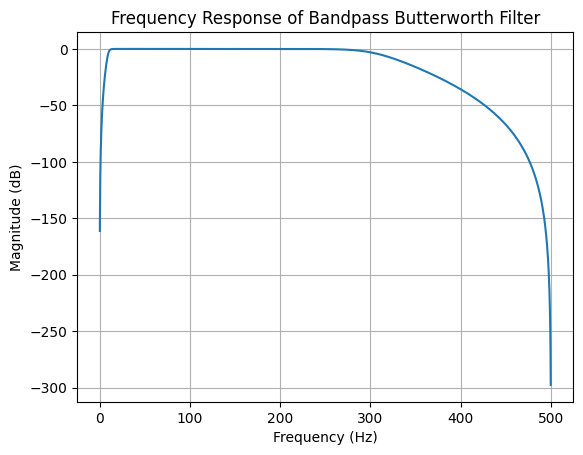

In [38]:
import matplotlib.pyplot as plt
import scipy.signal as sig
import numpy as np

# Close all existing plots
plt.close('all')

# Define the sampling frequency (Fs) and filter parameters
Fs = 1000  # Sampling frequency in Hz
n = 5      # Order of the Butterworth filter

# Define the critical frequencies relative to the Nyquist frequency
fc_low = 10   # Low cutoff frequency in Hz
fc_high = 300 # High cutoff frequency in Hz

# Normalize the critical frequencies to the Nyquist frequency (0.5 * sampling frequency)
w_low = fc_low / (Fs / 2)
w_high = fc_high / (Fs / 2)

# Design a bandpass Butterworth filter using scipy.signal.butter
# This function returns the numerator (b) and denominator (a) coefficients of the filter
b, a = sig.butter(n, [w_low, w_high], btype='bandpass')

# Compute the frequency response of the filter
# The function sig.freqz computes the frequency response of a digital filter
# worN is the number of points to use in the computation
w, h = sig.freqz(b, a, worN=2000)

# Convert the frequency axis from radians/sample to Hz
w = Fs * w / (2 * np.pi)

# Compute the magnitude response in decibels (dB)
h_db = 20 * np.log10(abs(h))

# Plot the frequency response of the filter
plt.figure()
plt.plot(w, h_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)  # Enable grid on the plot
plt.title("Frequency Response of Bandpass Butterworth Filter")
plt.show()


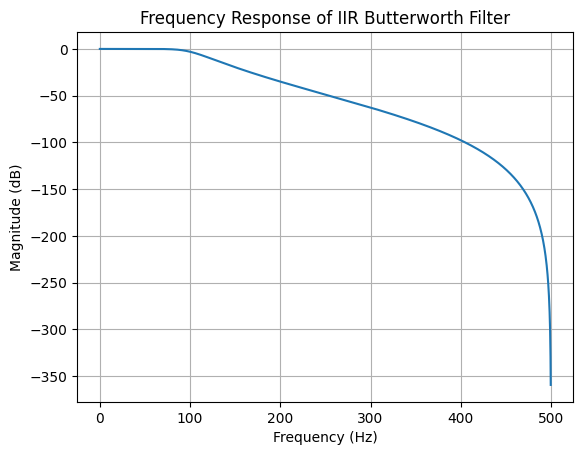

In [42]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

# IIR Butterworth filter parameters
Fs = 1000  # Sampling frequency in Hz
n = 5      # Filter order
fc = 100   # Cutoff frequency in Hz

# Calculate the normalized cutoff frequency (angular frequency)
w_c = 2 * fc / Fs

# Design the Butterworth filter using scipy.signal.butter
# This function returns the numerator (b) and denominator (a) coefficients of the filter
b, a = sig.butter(n, w_c)

# Compute the frequency response of the filter using sig.freqz
# This function returns the frequency (w) and complex frequency response (h) of the filter
[w, h] = sig.freqz(b, a, worN=2000)

# Convert the frequency axis from radians/sample to Hz
w = Fs * w / (2 * np.pi)

# Compute the magnitude response in decibels (dB)
h_db = 20 * np.log10(abs(h))

# Plot the frequency response of the IIR Butterworth filter
plt.figure()
plt.plot(w, h_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.title("Frequency Response of IIR Butterworth Filter")
plt.show()


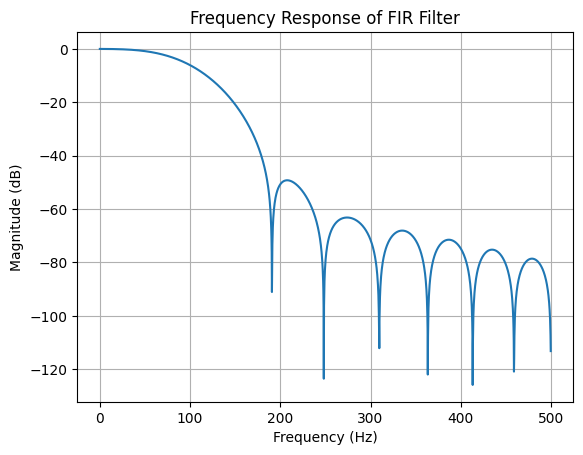

In [43]:
# FIR filter parameters
N = 20  # Filter length
fc = 100  # Cutoff frequency in Hz

# Calculate the normalized cutoff frequency (angular frequency)
w_c = 2 * fc / Fs

# Design the FIR filter using sig.firwin
# This function returns the filter coefficients (t) of the FIR filter
t = sig.firwin(N, w_c)

# Compute the frequency response of the FIR filter using sig.freqz
[w, h] = sig.freqz(t, worN=2000)

# Convert the frequency axis from radians/sample to Hz
w = Fs * w / (2 * np.pi)

# Compute the magnitude response in decibels (dB)
h_db = 20 * np.log10(abs(h))

# Plot the frequency response of the FIR filter
plt.figure()
plt.plot(w, h_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.title("Frequency Response of FIR Filter")
plt.show()